<a href="https://colab.research.google.com/github/TonThatRon/HSD-BERT/blob/main/BERT_finetuned_HSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install datasets
!pip install -U accelerate
!pip install -U transformers
!pip install nltk

  Using cached accelerate-0.30.1-py3-none-any.whl (302 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 k

In [ ]:
import torch
from datasets import load_dataset
from transformers import AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, f1_score
from transformers import Trainer, TrainingArguments

In [ ]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)
model_ckpt = "google-bert/bert-base-uncased"
from transformers import AutoModel, AutoTokenizer

bert = AutoModel.from_pretrained(model_ckpt)
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
bert.to(device)

cuda:0


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
def tokenize(batch):
 return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
import pandas as pd
from datasets import Dataset
# slipt train and test dataset
dataset = load_dataset("SetFit/hate_speech_offensive")
train_df = pd.DataFrame(dataset['train'])
train_df.head()



Repo card metadata block was not found. Setting CardData to empty.


,text,label,label_text
0,@EvanBecker513 @_TriggaPlease_ @MorbidMermaid ...,1,offensive language
1,"""@SnakecharmsDump: http://t.co/4b427dQZCV"" oh ...",1,offensive language
2,Dat bitch mouth made da honor roll,1,offensive language
3,&#8220;@Al_Teez: Fuck the cowboys. My birthday...,1,offensive language
4,WashPost Describes Charlie Crist's Bizarre Obs...,2,neither


In [ ]:
def remove_stopwords(text):
  nlp = spacy.load("en_core_web_sm")
  text = nlp(text)
  filtered_words = [token.text for token in text if not token.is_stop]
  text = ' '.join(filtered_words)
  return text


In [ ]:
import re
def remove_punctuations(text):
    punctuation = re.compile(r'[{};():,."/<>-]')
    text = punctuation.sub(' ', text)
    return text



In [ ]:
!pip install spacy



In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
def lemma(text):
  text = nlp(text)
  tokens = [token.lemma_ for token in text]
  text =' '.join(tokens)
  return text



/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
def remove_numbers(text):
    text = re.sub(r'\d+', '', text)
    return text


In [ ]:
def remove_whitespace(text):
    text =" ".join(text.split())
    return text


In [ ]:
def remove_special_characters(text):

    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', text)
    return text


In [ ]:
def preprocess(text):
  text = remove_stopwords(text)
  text = lemma(text)
  text = remove_special_characters(text)
  text = remove_numbers(text)
  text = remove_punctuations(text)
  text = remove_whitespace(text)
  return text

In [ ]:
test =" &,#,8220,@al_teez, ,fuck,cowboy, ,birthday,two,day,hoe!&#8221,&,#,128530"
print(preprocess(test))

al_teez fuck cowboy birthday day hoe


In [ ]:
train_df['text'] = train_df['text'].apply(preprocess)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
train_df.head()

,text,label,label_text
0,"[@evanbecker513, @_triggaplease, _, @morbidmer...",1,offensive language
1,"[ , @snakecharmsdump, , http, , t, co, 4b42...",1,offensive language
2,"[dat, bitch, mouth, make, da, honor, roll]",1,offensive language
3,"[&, #, 8220, @al_teez, , fuck, cowboy, , bir...",1,offensive language
4,"[washpost, describe, charlie, crist, 's, bizar...",2,neither


In [ ]:


train_dataset = dataset['train']
test_dataset = dataset['test']
print(train_dataset)
print(test_dataset)
train_data_tokenized = train_dataset.map(tokenize, batched=True, batch_size=None)
test_data_tokenized = test_dataset.map(tokenize, batched=True, batch_size=None)


# format dataset to torch [input_ids, attention_mask, label, token_type_ids]
train_data_tokenized.set_format("torch", columns=["input_ids", "attention_mask", "label" , "token_type_ids"])
test_data_tokenized.set_format("torch", columns=["input_ids", "attention_mask", "label" , "token_type_ids"])

print("------------------")
print(train_data_tokenized)
print(test_data_tokenized)

In [ ]:
num_labels = 3
model = (AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels=num_labels).to(device))
model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:

def compute_metrics(pred):
 labels = pred.label_ids
 preds = pred.predictions.argmax(-1)
 f1 = f1_score(labels, preds, average="weighted")
 acc = accuracy_score(labels, preds)
 return {"accuracy": acc, "f1": f1}

In [ ]:
batch_size = 4
logging_steps = len(train_data_tokenized) // batch_size
model_name = "BERT-HSD"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.02,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  eval_steps=40,
                                  save_total_limit = 5,
                                  logging_dir='./logs',
                                  log_level="error",
                                  save_strategy="epoch",
                                  load_best_model_at_end=True,)


In [ ]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
 compute_metrics=compute_metrics,
 train_dataset=train_data_tokenized,
 eval_dataset=test_data_tokenized,
 tokenizer=tokenizer)
trainer.train();


/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.364500,0.317119,0.913000,0.902643
2,0.274100,0.343174,0.919500,0.913677


In [ ]:
preds_output = trainer.predict(test_data_tokenized)
preds_output.metrics

{'test_loss': 0.31711944937705994,
 'test_accuracy': 0.913,
 'test_f1': 0.9026432998294124,
 'test_runtime': 16.259,
 'test_samples_per_second': 123.009,
 'test_steps_per_second': 30.752}

In [ ]:
!huggingface-cli login
trainer.push_to_hub()



n

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Token: 
Add token as git credential? (Y/n) n
Token is valid (permission: write).
Your token has been saved to /root/

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

training_args.bin:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/RonTon05/BERT-HSD/commit/4fabb0e265efdf0c072b361fd47f893a204e867d', commit_message='End of training', commit_description='', oid='4fabb0e265efdf0c072b361fd47f893a204e867d', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
 cm = confusion_matrix(y_true, y_preds, normalize="true")
 fig, ax = plt.subplots(figsize=(6, 6))
 disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
 disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
 plt.title("Normalized confusion matrix")
 plt.show()

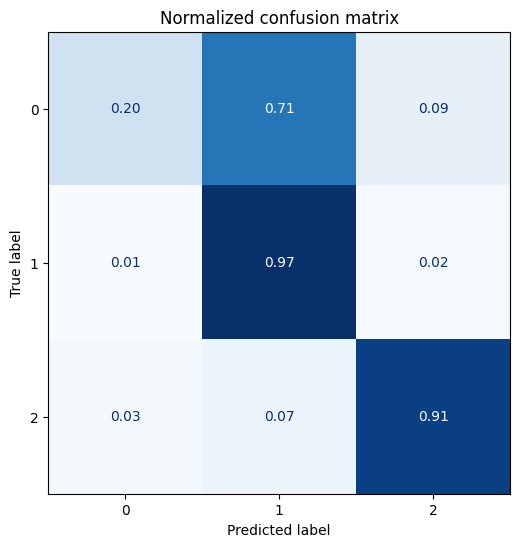

In [ ]:
import numpy as np
preds_output = trainer.predict(test_data_tokenized)
y_preds = np.argmax(preds_output.predictions, axis=1)
plot_confusion_matrix(y_preds, test_data_tokenized["label"].numpy(), ["0" , "1", "2"])

In [ ]:
#save model
torch.save(model , '/content/drive/MyDrive/BERT-HSD')

In [ ]:
the_model = torch.load('/content/drive/MyDrive/BERT-HSD')

In [ ]:
from transformers import AutoModel, AutoTokenizer
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model_ckpt = "google-bert/bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
text = "You are suck person"
input_ids = torch.tensor([tokenizer(text).input_ids]).to(device)
torch.argmax(the_model(input_ids).logits , dim = 1)
# np.argmax(preds_output.predictions, axis=1)



tensor([1], device='cuda:0')

In [ ]:
the_model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
!pip install keybert


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 8.5 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.8.4-py3-none-any.whl size=39200 sha256=8d32a962c407f87f44138e531241026a970e5bbad9c68628bfbea73d2b642889
  Stored in directory: /root/.cache/pip/wheels/97/ef/4c/6588bd7072b0cc04225b40e639b991e49ebd4e21fb81f0acee
Successfully built keybert


In [ ]:
from transformers import AutoTokenizer
from keybert import KeyBERT
kw_model = KeyBERT(model='all-MiniLM-L6-v2')

the_model.to(device)
# Đầu vào của bạn
sentences = ["He is useless, I dont know why he came to our neighbourhood", "That guy sucks", "He is such a retard"]

# Tiền xử lý đầu vào
inputs = tokenizer(sentences, return_tensors="pt", padding=True, truncation=True)
inputs = {key: value.to(device) for key, value in inputs.items()}
keywords = kw_model.extract_keywords(sentences)
# Dự đoán
outputs = the_model(**inputs)
print(keywords)

# Lấy dự đoán
predictions = torch.argmax(outputs.logits, dim=-1)

predict_score_and_class_dict = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}

for pred in predictions:
  print(predict_score_and_class_dict[pred.item()])


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[('useless', 0.5122), ('neighbourhood', 0.3718), ('know', 0.1872), ('dont', 0.1761), ('came', 0.1501)], [('sucks', 0.5532), ('guy', 0.4244)], [('retard', 0.6457)]]
Neither
Offensive Language
Offensive Language


In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.4/312.4 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 9.8 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl siz

In [ ]:
import gradio as gr

def predict(inputs):
    keywords =keywords = kw_model.extract_keywords(inputs,keyphrase_ngram_range=(2,2), stop_words='english')
    inputs = tokenizer(inputs, return_tensors="pt", padding=True, truncation=True)
    inputs = {key: value.to(device) for key, value in inputs.items()}
    outputs = the_model(**inputs)

    predictions = torch.argmax(outputs.logits, dim=-1)
    predict_score_and_class_dict = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}
    labels = [predict_score_and_class_dict[pred.item()] for pred in predictions]
    return {"labels": labels, "keywords": keywords}

iface = gr.Interface(fn=predict, inputs="textbox", outputs="textbox")
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1de894f074b8cf7e68.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
